<a href="https://colab.research.google.com/github/abdullah-dontcare/abdullah-dontcare/blob/main/nn_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf


In [2]:
import keras

In [3]:
mnist = tf.keras.datasets.mnist


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3)

model.save('handwritten.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8671 - loss: 0.4589
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9665 - loss: 0.1080
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9791 - loss: 0.0675


In [7]:
model = tf.keras.models.load_model('handwritten.keras')

loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0905
0.9739000201225281
0.08729762583971024


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os

digit_img_path = '/content/drive/MyDrive/digit img'

if os.path.isdir(digit_img_path):
    print(f'Directory found: {digit_img_path}')
    png_files = [f for f in os.listdir(digit_img_path) if f.endswith('.png')]
    if png_files:
        print('Found PNG files:')
        for f in png_files:
            print(f)
    else:
        print('No PNG files found in the directory.')
else:
    print(f'Directory not found: {digit_img_path}')
    print('Please ensure the folder "digit img" exists in your Google Drive and try again.')

Directory found: /content/drive/MyDrive/digit img
Found PNG files:
Untitled.png
Untitled1.png
Untitled2.png
Untitled3.png
Untitled4.png
Untitled5.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


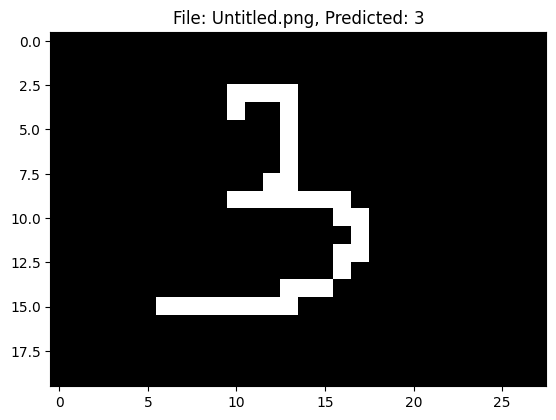

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


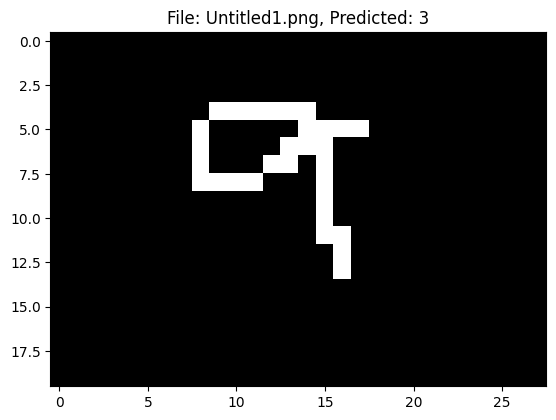

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


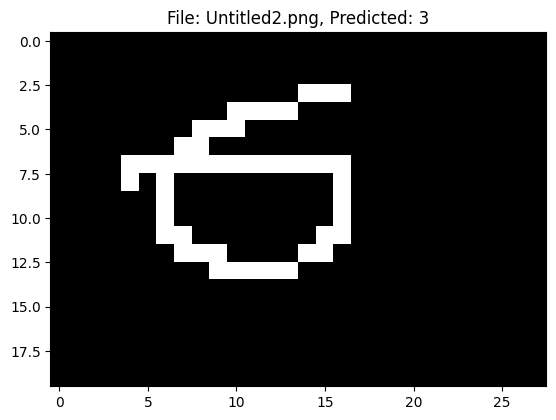

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


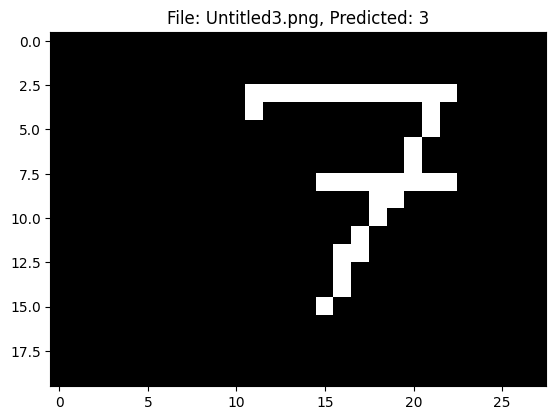

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


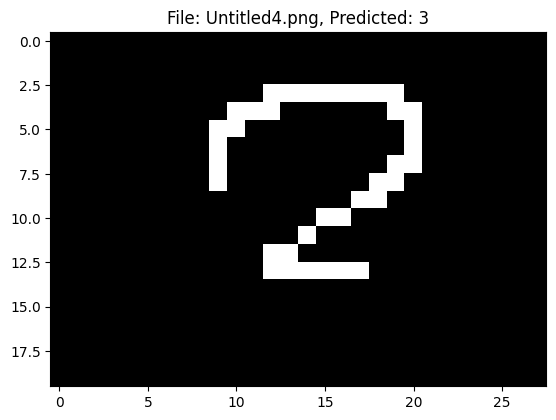

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


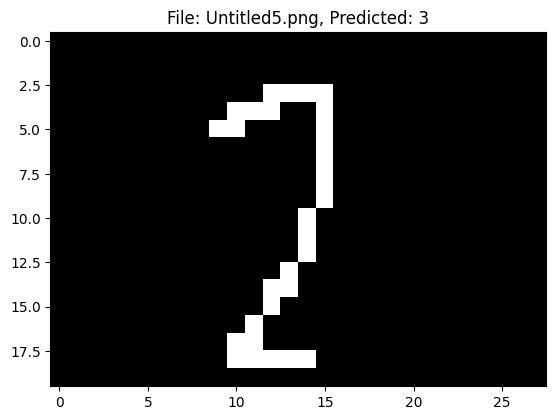

In [11]:
for file_name in png_files:
    img_path = os.path.join(digit_img_path, file_name)
    try:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:

            # Invert colors if necessary (MNIST has white digits on black background)
            # If your custom digits are black on white, you might need to invert.
            # Assuming digits are dark on light background, so invert for MNIST model compatibility
            _, processed_img = cv2.threshold(resized_img, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            processed_img = tf.keras.utils.normalize(processed_img, axis=1)

            # Reshape for the model
            processed_img = np.array(processed_img).reshape(1, 28, 28)

            prediction = model.predict(processed_img)
            predicted_digit = np.argmax(prediction)

            plt.imshow(img, cmap=plt.cm.binary)
            plt.title(f"File: {file_name}, Predicted: {predicted_digit}")
            plt.show()
        else:
            print(f"Could not load image: {file_name}")
    except Exception as e:
        print(f"Error processing {file_name}: {e}")